In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df_a = pd.read_csv("/home/spaceape/bachelor_thesis/data/lending-club/sample_acc.csv")
df_r = pd.read_csv("/home/spaceape/bachelor_thesis/data/lending-club/sample_rej.csv")

#df_a = pd.read_csv("/home/spaceape/bachelor_thesis/data/lending-club/accepted_2007_to_2017.csv")
#df_r = pd.read_csv("/home/spaceape/bachelor_thesis/data/lending-club/sample_rej.csv")


# 1. DATA WRANGLING
#count number of nans within each feature
nans_fa = pd.Series(df_a.isnull().sum(axis=0), name="nans")
nans_fa = nans_fa.sort_values(ascending=False)
nans_oa = pd.Series(df_a.isnull().sum(axis=1), name="nans")
nans_oa = nans_oa.sort_values(ascending=False)

/home/spaceape/anaconda3/envs/keras/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,55,112,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(df_a)

250000

In [4]:
# outcome variable
df_a["loan_status"].head()

0    Fully Paid
1       Current
2       Current
3       Current
4       Current
Name: loan_status, dtype: object

In [5]:
df_a.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount'],
      dtype='object', length=137)

In [6]:
df_r.columns

Index(['Unnamed: 0', 'Amount Requested', 'Application Date', 'Loan Title',
       'Risk_Score', 'Debt-To-Income Ratio', 'Zip Code', 'State',
       'Employment Length', 'Policy Code'],
      dtype='object')

In [7]:
df_r.head()

,Unnamed: 0,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,13397118,4000.0,2015-10-19,debt_consolidation,NaN,13.42%,170xx,PA,< 1 year,0.0
1,5639475,35000.0,2014-10-04,debt_consolidation,687.0,30.48%,018xx,MA,< 1 year,0.0
2,12797198,12000.0,2015-08-06,debt_consolidation,NaN,28.69%,346xx,FL,< 1 year,0.0
3,2167937,8000.0,2016-10-11,debt_consolidation,NaN,38.48%,750xx,TX,< 1 year,0.0
4,9826493,15000.0,2017-06-28,Home improvement,676.0,5.91%,014xx,MA,< 1 year,0.0


In [8]:
for col in df_r.columns:
    print(col in df_a.columns)

True
False
False
False
False
False
False
False
False
False


In [9]:
# drop the features containing more than 10% of NaNs
for feature in df_a[:]:
    if (nans_fa[feature] > (0.2*len(df_a))):
        print (feature, nans_fa[feature])
        df_a = df_a.drop(feature, 1)

id 249997
member_id 250000
desc 229311
mths_since_last_delinq 124028
mths_since_last_record 207376
next_pymnt_d 108805
mths_since_last_major_derog 183932
annual_inc_joint 246646
dti_joint 246646
verification_status_joint 246646
open_acc_6m 142120
open_il_6m 142120
open_il_12m 142120
open_il_24m 142120
mths_since_rcnt_il 144950
total_bal_il 142120
il_util 156168
open_rv_12m 142120
open_rv_24m 142120
max_bal_bc 142120
all_util 142129
inq_fi 142120
total_cu_tl 142120
inq_last_12m 142120
mths_since_recent_bc_dlq 189314
mths_since_recent_revol_delinq 164455
revol_bal_joint 248711
sec_app_earliest_cr_line 248711
sec_app_inq_last_6mths 248711
sec_app_mort_acc 248711
sec_app_open_acc 248711
sec_app_revol_util 248729
sec_app_open_il_6m 248711
sec_app_num_rev_accts 248711
sec_app_chargeoff_within_12_mths 248711
sec_app_collections_12_mths_ex_med 248711
sec_app_mths_since_last_major_derog 249565
hardship_type 249838
hardship_reason 249838
hardship_status 249838
deferral_term 249838
hardship_amoun

In [10]:
# print number of missing observation of given feature
for feature in df_a[:]:
    if (nans_fa[feature] > 0):
        print (feature, nans_fa[feature])

loan_amnt 3
funded_amnt 3
funded_amnt_inv 3
term 3
int_rate 3
installment 3
grade 3
sub_grade 3
emp_title 15409
emp_length 14250
home_ownership 3
annual_inc 5
verification_status 3
issue_d 3
loan_status 3
pymnt_plan 3
purpose 3
title 3839
zip_code 4
addr_state 3
dti 3
delinq_2yrs 10
earliest_cr_line 10
inq_last_6mths 10
open_acc 10
pub_rec 10
revol_bal 3
revol_util 159
total_acc 10
initial_list_status 3
out_prncp 3
out_prncp_inv 3
total_pymnt 3
total_pymnt_inv 3
total_rec_prncp 3
total_rec_int 3
total_rec_late_fee 3
recoveries 3
collection_recovery_fee 3
last_pymnt_d 1653
last_pymnt_amnt 3
last_credit_pull_d 15
collections_12_mths_ex_med 29
policy_code 3
application_type 3
acc_now_delinq 10
tot_coll_amt 11523
tot_cur_bal 11523
total_rev_hi_lim 11523
acc_open_past_24mths 8211
avg_cur_bal 11526
bc_open_to_buy 10619
bc_util 10759
chargeoff_within_12_mths 29
delinq_amnt 10
mo_sin_old_il_acct 18426
mo_sin_old_rev_tl_op 11524
mo_sin_rcnt_rev_tl_op 11524
mo_sin_rcnt_tl 11523
mort_acc 8211
mth

In [11]:
df_a = df_a.drop(["Unnamed: 0"], 1)
#df_a = df_a.drop(["Unnamed: 0", "hardship_flag", "emp_title", "zip_code", "last_pymnt_d", "last_credit_pull_d", "issue_d", "earliest_cr_line", "title"], 1)
#df_a = df_a.drop(["hardship_flag", "emp_title", "zip_code", "last_pymnt_d", "last_credit_pull_d", "issue_d", "earliest_cr_line", "title"], 1)

In [12]:
df_a.shape

(250000, 85)

In [13]:
# missing number of features
nans_oa = pd.Series(df_a.isnull().sum(axis=1), name="nans")
nans_oa = nans_oa.sort_values(ascending=False)
nans_oa.value_counts()

0     181413
1      38345
2      12794
34      7444
3       3275
4       1992
23      1550
25      1168
35       512
5        402
24       253
26       243
36       226
6        213
27        57
7         39
28        18
29        17
37         9
38         8
30         5
47         5
8          3
85         3
49         2
39         2
31         1
10         1
Name: nans, dtype: int64

In [14]:
# delete observations with x or more missing features
drp = nans_oa > 30
drp = drp[drp==True].index
df_a = df_a.drop(drp, axis=0)

nans_fa = pd.Series(df_a.isnull().sum(axis=0), name="nans")
nans_fa = nans_fa.sort_values(ascending=False)
nans_oa = pd.Series(df_a.isnull().sum(axis=1), name="nans")
nans_oa = nans_oa.sort_values(ascending=False)


In [15]:
len(df_a)

241788

In [16]:
df_a["loan_status"].value_counts()

Current               133523
Fully Paid             80372
Charged Off            20674
Late (31-120 days)      3559
In Grace Period         2396
Late (16-30 days)        796
Default                  333
Issued                   135
Name: loan_status, dtype: int64

In [17]:
df_a["emp_length"] = df_a["emp_length"].replace(["< 1 year", "1 year", "2 years", "3 years", "4 years", "5 years", "6 years", "7 years", "8 years", "9 years", "10 years", "10+ years"], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15])

In [18]:
df_a.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag
0,3000.0,3000.0,3000.0,36 months,13.11,101.25,B,B4,McFarlane Douglass & Companies,0.0,...,3.0,70.0,33.3,0.0,0.0,45808.0,25701.0,3800.0,38908.0,N
1,20000.0,20000.0,20000.0,36 months,5.32,602.30,A,A1,Assistant Vice President,0.0,...,1.0,100.0,33.3,0.0,0.0,522280.0,66551.0,56300.0,64980.0,N
2,10000.0,10000.0,10000.0,36 months,11.49,329.72,B,B5,Software Engineer,5.0,...,1.0,87.5,0.0,1.0,0.0,6500.0,1820.0,6500.0,0.0,N
3,17925.0,17925.0,17875.0,36 months,11.53,591.36,B,B5,Customer Service Representative,9.0,...,0.0,100.0,66.7,0.0,0.0,83459.0,40971.0,29900.0,53559.0,N
4,30000.0,30000.0,30000.0,60 months,12.99,682.44,C,C2,Marketing,15.0,...,2.0,92.9,75.0,0.0,0.0,296071.0,27223.0,21700.0,20000.0,N


In [19]:
# categorical variables
factors = list()
for feat in df_a:
    if (type(df_a[feat][0]) == type("string") and feat != "loan_status"):
        factors.append(feat) 
        print (feat, nans_fa[feat])

term 0
grade 0
sub_grade 0
emp_title 14895
home_ownership 0
verification_status 0
issue_d 0
pymnt_plan 0
purpose 0
title 3832
zip_code 1
addr_state 0
earliest_cr_line 0
initial_list_status 0
last_pymnt_d 1632
last_credit_pull_d 12
application_type 0
hardship_flag 0


In [20]:
#numerical variables
num = list()
for feat in df_a:
    if (type(df_a[feat][0]) != type("string") and feat != "loan_status"):
        factors.append(feat) 
        print (feat, nans_fa[feat])

loan_amnt 0
funded_amnt 0
funded_amnt_inv 0
int_rate 0
installment 0
emp_length 14029
annual_inc 0
dti 0
delinq_2yrs 0
inq_last_6mths 0
open_acc 0
pub_rec 0
revol_bal 0
revol_util 137
total_acc 0
out_prncp 0
out_prncp_inv 0
total_pymnt 0
total_pymnt_inv 0
total_rec_prncp 0
total_rec_int 0
total_rec_late_fee 0
recoveries 0
collection_recovery_fee 0
last_pymnt_amnt 0
collections_12_mths_ex_med 0
policy_code 0
acc_now_delinq 0
tot_coll_amt 3311
tot_cur_bal 3311
total_rev_hi_lim 3311
acc_open_past_24mths 0
avg_cur_bal 3314
bc_open_to_buy 2407
bc_util 2547
chargeoff_within_12_mths 0
delinq_amnt 0
mo_sin_old_il_acct 10214
mo_sin_old_rev_tl_op 3312
mo_sin_rcnt_rev_tl_op 3312
mo_sin_rcnt_tl 3311
mort_acc 0
mths_since_recent_bc 2271
mths_since_recent_inq 25293
num_accts_ever_120_pd 3311
num_actv_bc_tl 3311
num_actv_rev_tl 3311
num_bc_sats 1414
num_bc_tl 3311
num_il_tl 3311
num_op_rev_tl 3311
num_rev_accts 3311
num_rev_tl_bal_gt_0 3311
num_sats 1414
num_tl_120dpd_2m 13117
num_tl_30dpd 3311
num_t

In [21]:
df_a = df_a.reindex(range(0, len(df_a)))

In [22]:
len(df_a)

241788

In [23]:
# from sklearn.preprocessing import Imputer
# imp_str = Imputer(missing_values="NaN", strategy='most_frequent', axis=0)
# imp_num = Imputer(missing_values="NaN", strategy='median', axis=0)

# for feat in df_a.columns:
#     if (nans_fa[feat] > 0) and (feat != "loan_status"):
#         if feat in factors:
#             #df_a[feat] = imp_str.fit_transform(np.reshape(df_a[feat], (len(df_a[feat]), 1)))
#             tmp = df_a[feat].values.reshape((len(df_a[feat])))
#             print (tmp)
#             #print (imp_str.fit_transform(tmp), 1)
#         else: 
#             df_a[feat] = imp_num.fit_transform(np.reshape(df_a[feat], (len(df_a[feat]), 1)))
#             #tmp = df_a[feat].values.reshape(len(df_a[feat]))
#             #print (tmp)
#             #print (imp_num.fit_transform(tmp, 1))
            
# #df_a[factors] = pd.DataFrame(imp_str.fit_transform(df_a[factors]), index=df_a.index, columns=df_a[factors].columns)

In [24]:
nans_fa = pd.Series(df_a.isnull().sum(axis=0), name="nans")
nans_fa = nans_fa.sort_values(ascending=False)
nans_oa = pd.Series(df_a.isnull().sum(axis=1), name="nans")
nans_oa = nans_oa.sort_values(ascending=False)

In [25]:
# manual encoding
stat_used = ["Current", "Fully Paid", "Default", "Charged Off"]
default = [0, 0, 1, 1]
stat_notused = []
nans = []

for i in (df_a["loan_status"].unique()):
    if i not in stat_used:
        stat_notused.append(i)
        nans.append(np.nan)
        
#df_a["loan_status"] = df_a["loan_status"].replace(["Late (31-120 days)", "Late (16-30 days)", "In Grace Period", "Issued", "Does not meet the credit policy. Status:Fully Paid", "Does not meet the credit policy. Status:Charged Off"],[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])
df_a["loan_status"] = df_a["loan_status"].replace(stat_notused, nans)
drp = df_a["loan_status"] == np.nan
drp = drp[drp==True].index
df_a = df_a.drop(drp, axis=0)
df_a["loan_status"] = df_a["loan_status"].replace(stat_used, default)

In [28]:
len(df_a)

241788

In [29]:
df_a

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag
0,3000.0,3000.0,3000.0,36 months,13.11,101.25,B,B4,McFarlane Douglass & Companies,0.0,...,3.0,70.0,33.3,0.0,0.0,45808.0,25701.0,3800.0,38908.0,N
1,20000.0,20000.0,20000.0,36 months,5.32,602.30,A,A1,Assistant Vice President,0.0,...,1.0,100.0,33.3,0.0,0.0,522280.0,66551.0,56300.0,64980.0,N
2,10000.0,10000.0,10000.0,36 months,11.49,329.72,B,B5,Software Engineer,5.0,...,1.0,87.5,0.0,1.0,0.0,6500.0,1820.0,6500.0,0.0,N
3,17925.0,17925.0,17875.0,36 months,11.53,591.36,B,B5,Customer Service Representative,9.0,...,0.0,100.0,66.7,0.0,0.0,83459.0,40971.0,29900.0,53559.0,N
4,30000.0,30000.0,30000.0,60 months,12.99,682.44,C,C2,Marketing,15.0,...,2.0,92.9,75.0,0.0,0.0,296071.0,27223.0,21700.0,20000.0,N
5,16000.0,16000.0,16000.0,60 months,12.79,362.34,C,C1,Repair Technician,0.0,...,1.0,82.6,33.3,0.0,0.0,41900.0,16940.0,14200.0,15000.0,N
6,18700.0,18700.0,18700.0,60 months,28.14,583.83,G,G2,POS Administrator,15.0,...,1.0,86.7,83.3,0.0,0.0,302461.0,83836.0,42700.0,67411.0,N
7,17750.0,17750.0,17750.0,60 months,17.86,449.39,D,D5,Electronics Tech Supervisor,15.0,...,0.0,100.0,100.0,0.0,0.0,71804.0,51799.0,20800.0,48804.0,N
8,5000.0,5000.0,5000.0,36 months,15.31,174.09,C,C2,Columbia University,8.0,...,0.0,100.0,66.7,0.0,0.0,13596.0,12444.0,7100.0,0.0,N
9,15000.0,15000.0,15000.0,36 months,11.67,495.86,B,B4,Direct Care Counselor,4.0,...,1.0,100.0,87.5,0.0,0.0,226078.0,55460.0,19300.0,31978.0,N


In [30]:
df_a = df_a.reindex()
df_a

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag
0,3000.0,3000.0,3000.0,36 months,13.11,101.25,B,B4,McFarlane Douglass & Companies,0.0,...,3.0,70.0,33.3,0.0,0.0,45808.0,25701.0,3800.0,38908.0,N
1,20000.0,20000.0,20000.0,36 months,5.32,602.30,A,A1,Assistant Vice President,0.0,...,1.0,100.0,33.3,0.0,0.0,522280.0,66551.0,56300.0,64980.0,N
2,10000.0,10000.0,10000.0,36 months,11.49,329.72,B,B5,Software Engineer,5.0,...,1.0,87.5,0.0,1.0,0.0,6500.0,1820.0,6500.0,0.0,N
3,17925.0,17925.0,17875.0,36 months,11.53,591.36,B,B5,Customer Service Representative,9.0,...,0.0,100.0,66.7,0.0,0.0,83459.0,40971.0,29900.0,53559.0,N
4,30000.0,30000.0,30000.0,60 months,12.99,682.44,C,C2,Marketing,15.0,...,2.0,92.9,75.0,0.0,0.0,296071.0,27223.0,21700.0,20000.0,N
5,16000.0,16000.0,16000.0,60 months,12.79,362.34,C,C1,Repair Technician,0.0,...,1.0,82.6,33.3,0.0,0.0,41900.0,16940.0,14200.0,15000.0,N
6,18700.0,18700.0,18700.0,60 months,28.14,583.83,G,G2,POS Administrator,15.0,...,1.0,86.7,83.3,0.0,0.0,302461.0,83836.0,42700.0,67411.0,N
7,17750.0,17750.0,17750.0,60 months,17.86,449.39,D,D5,Electronics Tech Supervisor,15.0,...,0.0,100.0,100.0,0.0,0.0,71804.0,51799.0,20800.0,48804.0,N
8,5000.0,5000.0,5000.0,36 months,15.31,174.09,C,C2,Columbia University,8.0,...,0.0,100.0,66.7,0.0,0.0,13596.0,12444.0,7100.0,0.0,N
9,15000.0,15000.0,15000.0,36 months,11.67,495.86,B,B4,Direct Care Counselor,4.0,...,1.0,100.0,87.5,0.0,0.0,226078.0,55460.0,19300.0,31978.0,N


In [31]:
# DROPPING ALL THE ROWS WITH NANs
df_a = df_a.dropna()
df_a = df_a.reset_index()

In [32]:
len(df_a)

170519

In [33]:
df_a["loan_status"].value_counts()

0.0    155114
1.0     15405
Name: loan_status, dtype: int64

In [34]:
df_a.shape

(170519, 86)

In [35]:
df_a.head()

,index,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag
0,0,3000.0,3000.0,3000.0,36 months,13.11,101.25,B,B4,McFarlane Douglass & Companies,...,3.0,70.0,33.3,0.0,0.0,45808.0,25701.0,3800.0,38908.0,N
1,2,10000.0,10000.0,10000.0,36 months,11.49,329.72,B,B5,Software Engineer,...,1.0,87.5,0.0,1.0,0.0,6500.0,1820.0,6500.0,0.0,N
2,4,30000.0,30000.0,30000.0,60 months,12.99,682.44,C,C2,Marketing,...,2.0,92.9,75.0,0.0,0.0,296071.0,27223.0,21700.0,20000.0,N
3,5,16000.0,16000.0,16000.0,60 months,12.79,362.34,C,C1,Repair Technician,...,1.0,82.6,33.3,0.0,0.0,41900.0,16940.0,14200.0,15000.0,N
4,6,18700.0,18700.0,18700.0,60 months,28.14,583.83,G,G2,POS Administrator,...,1.0,86.7,83.3,0.0,0.0,302461.0,83836.0,42700.0,67411.0,N


In [36]:
y = np.asarray(df_a["loan_status"], dtype=np.int)

In [37]:
# prepare independent variable
y = df_a["loan_status"]
y = np.asarray(y, dtype=np.int)
df_a = df_a.drop(["loan_status"], 1)

In [38]:
#df_a = df_a.drop(["emp_title"], 1)

# remove categorical vars with only one output
for feat in factors:
    if len(df_a[feat].unique()) == 1:
        df_a = df_a.drop([feat], 1)

# categorical variables
factors = list()
factors_idx = list()
for feat in df_a:
    if (type(df_a[feat][0]) == type("string")):
        factors.append(feat)
        factors_idx.append(df_a.columns.get_loc(feat))
        print (feat, len(df_a[feat].unique()))
        

term 2
grade 7
sub_grade 35
emp_title 68939
home_ownership 6
verification_status 3
issue_d 59
purpose 13
title 6825
zip_code 889
addr_state 50
earliest_cr_line 634
initial_list_status 2
last_pymnt_d 59
last_credit_pull_d 59
application_type 3


In [39]:
factors_idx

[4, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18, 21, 28, 38, 40, 42]

In [40]:
#numerical variables
num = list()
num_idx = list()
for feat in df_a:
    if (type(df_a[feat][0]) != type("string") and feat != "loan_status"):
        num.append(feat)
        num_idx.append(df_a.columns.get_loc(feat))
        #print (feat, len(df_a[feat].unique()))

In [41]:
print(num_idx)

[0, 1, 2, 3, 5, 6, 10, 12, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]


In [42]:
k = df_a["title"].value_counts()
k

Debt consolidation                      90522
Credit card refinancing                 34257
Home improvement                        10351
Other                                    8276
Major purchase                           3283
Medical expenses                         1728
Business                                 1625
Debt Consolidation                       1489
Car financing                            1424
Moving and relocation                    1014
Vacation                                  993
Home buying                               615
Consolidation                             585
debt consolidation                        450
Credit Card Consolidation                 218
consolidation                             183
Consolidation Loan                        178
Debt Consolidation Loan                   166
Home Improvement                          152
Credit Card Payoff                        150
Personal Loan                             145
Consolidate                       

In [43]:
for i in k.index:
    if (k[i]>10 and k[i]<50):
        print (i)

debt
personal loan
Debt Loan
Credit card consolidation
credit cards
consolidation loan
Credit Card
Credit Card Loan
Credit Consolidation
loan
credit card
Consolidation loan
CC Consolidation
Home Improvement Loan
Wedding
freedom
Credit card payoff
Debt consolidation 
Debt consolidation loan
Credit Card Refi
pay off credit cards
Credit Card Refinancing
debt consolidation loan
debt free
Credit cards
Credit card refinance
Debt Payoff
Credit Card Debt Consolidation
Consolidation 
My loan
my loan
Loan 1
Loan1
Home
Debt Consolodation
Bills
Credit Card Debt
CONSOLIDATION
Bill Consolidation
Lending Club
Medical
Pay Off
CC Loan
Personal loan
Wedding Loan
Loan Consolidation
debt loan
credit card debt
CC Payoff
debt payoff
Freedom Loan
Debt Consol
Relief
Refi
credit card refinance loan
Credit card
Debt 
Wedding expenses
refinance
Pay off
Debt free
Fresh Start
debt consolidation 
pay off
Pool Loan
Credit Card Pay Off
Debt payoff
Home Improvements
Pay off credit cards
credit card pay off
CC Refinanc

In [44]:
df_a["emp_title"][0]

'McFarlane Douglass & Companies'

In [45]:
np.mean(k.values)

24.984468864468866

In [46]:
np.median(k.values)

1.0

In [47]:
sum(k > 50)

41

In [48]:
for i in df_a.index:
    df_a.set_value(i, "emp_title", df_a["emp_title"][i].lower())

/home/spaceape/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [49]:
df_a.shape

(170519, 82)

In [50]:
# label encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in factors:
    #print (feat, len(df_a[feat].unique()), df_a[feat].unique())
    a = le.fit_transform(df_a[feat])
    df_a[feat] = a

In [119]:
# one-hot-encoding categorical variables
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

X_cat = []

for feat in factors:
    a = enc.fit_transform(df_a[feat].reshape(len(df_a), 1))
    X_cat.append(a)
    #print (a)

# for col in range(0, X_cat.shape[1]):
#     a = enc.fit_transform(X_cat[:, col].reshape((X_cat.shape[0], 1)))
# #     X_cat[:, col] = a
#     print (a.shape)

# for feat in factors:
#     a = df_a[feat].reshape((len(df_a),1))
#     a = enc.fit_transform(a)
#     #print(a.shape)
#     #X_cat[:,factors.index(feat)] = a
#     np.insert(X_cat, a.shape[1], a)
#     print (type(a))

/home/spaceape/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


MemoryError: 

In [ ]:
# a = np.array(np.zeros((len(df_a), 2)))
# b = np.array(np.zeros((len(df_a), 7)))

# #print (a.shape, b.shape)
# #print (a, b)
# print(np.concatenate((a, b), axis=1).shape)
# print(np.concatenate((a, b), axis=1))

In [51]:
df_a.head()

,index,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,0,3000.0,3000.0,3000.0,0,13.11,101.25,1,8,32923,...,0.0,3.0,70.0,33.3,0.0,0.0,45808.0,25701.0,3800.0,38908.0
1,2,10000.0,10000.0,10000.0,0,11.49,329.72,1,9,49733,...,0.0,1.0,87.5,0.0,1.0,0.0,6500.0,1820.0,6500.0,0.0
2,4,30000.0,30000.0,30000.0,1,12.99,682.44,2,11,32441,...,0.0,2.0,92.9,75.0,0.0,0.0,296071.0,27223.0,21700.0,20000.0
3,5,16000.0,16000.0,16000.0,1,12.79,362.34,2,10,43949,...,0.0,1.0,82.6,33.3,0.0,0.0,41900.0,16940.0,14200.0,15000.0
4,6,18700.0,18700.0,18700.0,1,28.14,583.83,6,31,39797,...,0.0,1.0,86.7,83.3,0.0,0.0,302461.0,83836.0,42700.0,67411.0


In [52]:
df_a.shape

(170519, 82)

In [53]:
# preparation for embedding
cat_sz = [(c, len(df_a[c].unique())+1) for c in factors]
cat_sz

[('term', 3),
 ('grade', 8),
 ('sub_grade', 36),
 ('emp_title', 60315),
 ('home_ownership', 7),
 ('verification_status', 4),
 ('issue_d', 60),
 ('purpose', 14),
 ('title', 6826),
 ('zip_code', 890),
 ('addr_state', 51),
 ('earliest_cr_line', 635),
 ('initial_list_status', 3),
 ('last_pymnt_d', 60),
 ('last_credit_pull_d', 60),
 ('application_type', 4)]

In [335]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]
emb_szs

[(3, 2),
 (8, 4),
 (36, 18),
 (28219, 50),
 (7, 4),
 (4, 2),
 (60, 30),
 (14, 7),
 (3177, 50),
 (874, 50),
 (51, 26),
 (606, 50),
 (3, 2),
 (59, 30),
 (59, 30),
 (4, 2)]

In [54]:
df_a = df_a.reset_index(drop=True)
df_a.head()

,index,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,0,3000.0,3000.0,3000.0,0,13.11,101.25,1,8,32923,...,0.0,3.0,70.0,33.3,0.0,0.0,45808.0,25701.0,3800.0,38908.0
1,2,10000.0,10000.0,10000.0,0,11.49,329.72,1,9,49733,...,0.0,1.0,87.5,0.0,1.0,0.0,6500.0,1820.0,6500.0,0.0
2,4,30000.0,30000.0,30000.0,1,12.99,682.44,2,11,32441,...,0.0,2.0,92.9,75.0,0.0,0.0,296071.0,27223.0,21700.0,20000.0
3,5,16000.0,16000.0,16000.0,1,12.79,362.34,2,10,43949,...,0.0,1.0,82.6,33.3,0.0,0.0,41900.0,16940.0,14200.0,15000.0
4,6,18700.0,18700.0,18700.0,1,28.14,583.83,6,31,39797,...,0.0,1.0,86.7,83.3,0.0,0.0,302461.0,83836.0,42700.0,67411.0


In [55]:
# setting up the structure of dataset
X = np.asarray(df_a)
X_num = np.asarray(df_a[num])

features = df_a.columns

In [57]:
# cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle=True, random_state = 12)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    
#     X_num_train, x_num_test = X_num[train_index], X_num[test_index]

print("%s train %s test" % (len(y_train), len(y_test)))

X_cat_train = []
X_cat_test = []

#for i in range(0, len(X_cat)):
    #X_cat_train.append(X_cat[i][train_index])
    #X_cat_test.append(X_cat[i][test_index])

149205 train 21314 test


In [58]:
print("%s min %s max" % (np.min(X_train[:,0]), np.max(X_train[:,0])))

0.0 min 241786.0 max


In [59]:
# feature scaling
from sklearn import preprocessing
mascaler = preprocessing.MaxAbsScaler()
X_train[:, num_idx] = mascaler.fit_transform(X_train[:, num_idx])
X_test[:, num_idx] = mascaler.fit_transform(X_test[:, num_idx])

In [60]:
# concatenate numerical arrays and categorical arrays (dummy variables)
# XX_train, XX_test contain scaled numerical values and one-hot-encoded categorical
XX_train = np.concatenate(X_cat_train, axis=1)
XX_train = np.concatenate((XX_train, X_train[:, num_idx]), axis=1)

XX_test = np.concatenate(X_cat_test, axis=1)
XX_test = np.concatenate((XX_test, X_test[:, num_idx]), axis=1)

ValueError: need at least one array to concatenate

In [61]:
#random seeds for stochastic parts of neural network 
np.random.seed(10)
from tensorflow import set_random_seed
set_random_seed(15)

from keras.models import Sequential
from keras.layers import Dense, Activation, Merge, Reshape, Dropout
from keras.layers.embeddings import Embedding

/home/spaceape/anaconda3/envs/keras/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [62]:
emb_szs

NameError: name 'emb_szs' is not defined

In [53]:
def model():
    models = []

    model_cat_01 = Sequential()
    model_cat_01.add(Embedding(3, 2, input_length=1))
    model_cat_01.add(Reshape(target_shape=(2, )))
    models.append(model_cat_01)

    model_cat_02 = Sequential()
    model_cat_02.add(Embedding(8, 4, input_length=1))
    model_cat_02.add(Reshape(target_shape=(4, )))
    models.append(model_cat_02)

    model_cat_03 = Sequential()
    model_cat_03.add(Embedding(36, 18, input_length=1))
    model_cat_03.add(Reshape(target_shape=(18, )))
    models.append(model_cat_03)

    model_cat_04 = Sequential()
    model_cat_04.add(Embedding(31938, 50, input_length=1))
    model_cat_04.add(Reshape(target_shape=(50, )))
    models.append(model_cat_04)

    model_cat_05 = Sequential()
    model_cat_05.add(Embedding(7, 4, input_length=1))
    model_cat_05.add(Reshape(target_shape=(4, )))
    models.append(model_cat_05)

    model_cat_06 = Sequential()
    model_cat_06.add(Embedding(4, 2, input_length=1))
    model_cat_06.add(Reshape(target_shape=(2, )))
    models.append(model_cat_06)

    model_cat_07 = Sequential()
    model_cat_07.add(Embedding(60, 30, input_length=1))
    model_cat_07.add(Reshape(target_shape=(30, )))
    models.append(model_cat_07)

    model_cat_08 = Sequential()
    model_cat_08.add(Embedding(14, 7, input_length=1))
    model_cat_08.add(Reshape(target_shape=(7, )))
    models.append(model_cat_08)

    model_cat_09 = Sequential()
    model_cat_09.add(Embedding(3177, 50, input_length=1))
    model_cat_09.add(Reshape(target_shape=(50, )))
    models.append(model_cat_09)

    model_cat_10 = Sequential()
    model_cat_10.add(Embedding(874, 50, input_length=1))
    model_cat_10.add(Reshape(target_shape=(50, )))
    models.append(model_cat_10)

    model_cat_11 = Sequential()
    model_cat_11.add(Embedding(51, 26, input_length=1))
    model_cat_11.add(Reshape(target_shape=(26, )))
    models.append(model_cat_11)

    model_cat_12 = Sequential()
    model_cat_12.add(Embedding(606, 50, input_length=1))
    model_cat_12.add(Reshape(target_shape=(50, )))
    models.append(model_cat_12)

    model_cat_13 = Sequential()
    model_cat_13.add(Embedding(3, 2, input_length=1))
    model_cat_13.add(Reshape(target_shape=(2, )))
    models.append(model_cat_13)

    model_cat_14 = Sequential()
    model_cat_14.add(Embedding(59, 30, input_length=1))
    model_cat_14.add(Reshape(target_shape=(30, )))
    models.append(model_cat_14)

    model_cat_15 = Sequential()
    model_cat_15.add(Embedding(59, 30, input_length=1))
    model_cat_15.add(Reshape(target_shape=(30, )))
    models.append(model_cat_15)

    model_cat_16 = Sequential()
    model_cat_16.add(Embedding(4, 2, input_length=1))
    model_cat_16.add(Reshape(target_shape=(2, )))
    models.append(model_cat_16)

    model_num = Sequential()
    model_num.add(Dense(1024, input_dim=X_train[:, num_idx].shape[1]))
    models.append(model_num)

    model = Sequential()
    # model.add(Embedding())
    model.add(Merge(models, mode="concat"))
    model.add(Dense(len(X_train), input_dim=X_train.shape[1], activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(15, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=["accuracy"])
    
    return model

In [66]:
def model_1():
    model = Sequential()
    model.add(Dense(X_train.shape[0], input_dim=X_train.shape[1], activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(15, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=["accuracy"])
    return model

In [67]:
kfold = StratifiedKFold(n_splits = 10, 
                            random_state = 231, 
                            shuffle = True) 
runs_per_fold = 2

In [70]:
model1 = model_1()
emb = model1.fit(X_train, y_train, validation_split=0.2, epochs=4, batch_size=512)

Train on 119364 samples, validate on 29841 samples
Epoch 1/4
 76800/119364 [==================>...........] - ETA: 6:41 - loss: 1.4716 - acc: 0.9086

KeyboardInterrupt: 

In [69]:
emb = model.fit(X_train_, y_train, validation_split=0.2, epochs=10, batch_size=512)

NameError: name 'model' is not defined

In [281]:
score = model1.evaluate(X_test, y_test, batch_size=512)
score

8511/8511 [==============================] - 19s 2ms/step


[1.4449662186538916, 0.9103513135849526]

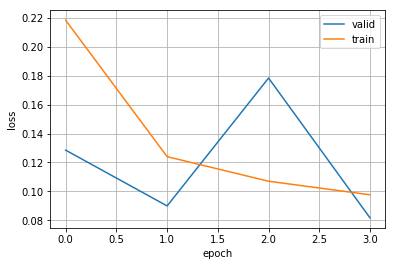

In [273]:
# plot loss vs # model epochs trained
plt.plot(emb.history['val_loss'])
plt.plot(emb.history['loss'])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['valid','train'])

Text(0,0.5,'accuracy')

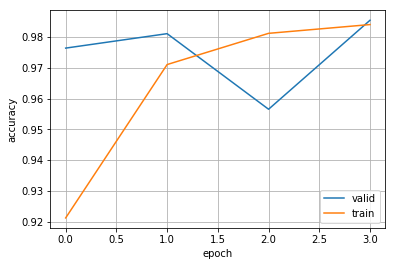

In [274]:
# plot accuracy vs # epochs
plt.plot(emb.history['val_acc'])
plt.plot(emb.history['acc'])
plt.legend(['valid','train'])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [348]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
selector1 = SelectKBest(f_classif)
selector2 = SelectKBest(chi2)
top_features1 = selector1.fit_transform(X, y)
top_features2 = selector2.fit_transform(X, y)
mask1 = selector1.get_support()
mask2 = selector2.get_support()
columns1 = []
columns2 = []

In [315]:
for col in range(X.shape[1]):
    if mask1[col] == True:
        columns1.append(df_a.columns[col])
    if mask2[col] == True:
        columns2.append(df_a.columns[col])
        
sc1 = pd.DataFrame(selector1.scores_, columns=["anova"], index=features)
sc1 = sc1.sort_values(by=["anova"], ascending=False)
sc2 = pd.DataFrame(selector2.scores_, columns=["chi2"], index=features)
sc2 = sc2.sort_values(by=["chi2"], ascending=False)

sc2

,chi2
recoveries,6.600664e+07
tot_hi_cred_lim,4.730671e+07
out_prncp,3.728913e+07
out_prncp_inv,3.727617e+07
tot_cur_bal,3.567078e+07
last_pymnt_amnt,1.533409e+07
total_rec_prncp,1.533399e+07
collection_recovery_fee,1.037983e+07
bc_open_to_buy,6.925270e+06
total_rev_hi_lim,6.165087e+06


In [316]:
sc1

,anova
recoveries,25573.532963
collection_recovery_fee,20819.809346
out_prncp,3899.481568
out_prncp_inv,3899.344939
sub_grade,2826.455061
grade,2692.279105
int_rate,2364.082435
last_credit_pull_d,2280.071242
total_rec_prncp,2128.495969
last_pymnt_amnt,1402.007953


In [342]:
# classical ML methods
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn import svm
svm = svm.SVC()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

from sklearn.neural_network import MLPClassifier
#mlp = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
mlp = MLPClassifier(solver='sgd', random_state=1)

In [318]:
# finetuning parameters
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from scipy.stats import randint as sp_randint

In [41]:
#import scipy
# SVM
# [1, 10, 30, 50, 70, 80, 90, 100, 120, 150, 1000]
# parameters_svm = {"kernel" : ["linear", "rbf"],
#                   "C" : [1, 10, 100, 1000],
#                   "gamma" : [0, 0.001]}

parameters_svm = {"kernel" : ["linear", "rbf"],
                  "C" : [1, 10, 100, 1000],
                  "gamma" : [0.001]}

# parameters_svm = {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),
#                   'kernel': ['rbf'], 'class_weight':['balanced', None]}
# svm_opt = RandomizedSearchCV(svm, parameters_svm, 1)
svm_opt = GridSearchCV(svm, parameters_svm,refit=True)

In [ ]:
svm_opt.fit(X_train, y_train)
print ("SVM parameters: ", svm_opt.best_params_)
print ("SVM accuracy: ",  svm_opt.best_estimator_.score(X_test, y_test))
#print ("SVM best estimator: ",  svma_opt.best_estimator_)
print ("SVM precision score: ",  metrics.precision_score(y_test, svm_opt.predict(X_test)))
print ("SVM recall score: ",  metrics.recall_score(y_test, svm_opt.predict(X_test)))

In [320]:
parameters_rf = {"max_depth": [3, 20],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 15),
              "min_samples_leaf": sp_randint(1, 15),
              "n_estimators": sp_randint(10, 36),
              "bootstrap": [True],
              "criterion": ["gini", "entropy"]}
rf_opt = RandomizedSearchCV(rf, parameters_rf, 50)
rf_opt.fit(X_train, y_train)
print ("decision tree parameters: ", rf_opt.best_params_)
print ("decision tree accuracy: ",  rf_opt.best_estimator_.score(X_test, y_test))
#print ("decision tree best estimator: ",  dt_opt.best_estimator_)
print ("decision tree precision score: ",  metrics.precision_score(y_test, rf_opt.predict(X_test)))
print ("decision tree recall score: ",  metrics.recall_score(y_test, rf_opt.predict(X_test)))


decision tree parameters:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 29}
decision tree accuracy:  0.9970622796709753
decision tree precision score:  1.0
decision tree recall score:  0.9672131147540983


In [319]:
lr.fit(X_train, y_train)
print ("logistic regression accuracy: ", lr.score(X_test, y_test))
print ("logistic regression precision score: ",  metrics.precision_score(y_test, lr.predict(X_test)))
print ("logistic regression recall score: ",  metrics.recall_score(y_test, lr.predict(X_test)))
print ("logistic regression F1 score: ",  metrics.f1_score(y_test, lr.predict(X_test)))

logistic regression accuracy:  0.9911868390129259
logistic regression precision score:  1.0
logistic regression recall score:  0.9016393442622951
logistic regression F1 score:  0.9482758620689655


In [345]:
parameters_mlp = {"alpha": [1e-4, 1e-5, 1e-6],
                 "hidden_layer_sizes": [(5,5), (10,5), (15,5), (20,), (25,), (15,), (20,), (25,)]}
parameters={
'learning_rate': ["constant", "invscaling", "adaptive"],
"hidden_layer_sizes": [(5,5), (10,5), (15,5), (20,), (25,), (15,), (20,), (25,)],
'alpha': [1e-4, 1e-5, 1e-6],
'activation': ["logistic", "relu", "Tanh"]
}

mlp_opt = GridSearchCV(estimator=MLPClassifier(),param_grid=parameters,verbose=2,cv=10)
#mlp_opt = RandomizedSearchCV(mlp, parameters_mlp, n_iter=50, cv=10)

In [ ]:
mlp_opt = mlp_opt.fit(X_train, y_train)
print(mlp_opt.best_params_)
pred = mlp_opt.predict(X_test)

print ("confusion matrix: ", "\n", metrics.confusion_matrix(y_test, pred))
print ("accuracy score: ", metrics.accuracy_score(y_test, pred))
print ("precision score: ", metrics.precision_score(y_test, pred))
print ("recall score: ", metrics.recall_score(y_test, pred))
print ("F1 score: ", metrics.f1_score(y_test, pred))

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=constant 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=constant -   7.5s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=constant 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=constant -   9.5s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=constant 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=constant -   9.4s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=constant 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=constant -   9.6s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=constant 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=constant -   9.5s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=constant 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=constant -   7.9s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=constant 
[CV]  activation=logistic, alpha=0.0001, hidd

/home/spaceape/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=constant -   7.4s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=constant 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=constant -   7.5s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=invscaling 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=invscaling -   7.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=invscaling 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=invscaling -   7.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=invscaling 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=invscaling -   7.5s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate=invscaling 
[CV]  activation=logistic, alph

/home/spaceape/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 5), learning_rate=invscaling -   1.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 5), learning_rate=invscaling 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 5), learning_rate=invscaling -  10.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 5), learning_rate=invscaling 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 5), learning_rate=invscaling -  12.5s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 5), learning_rate=invscaling 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 5), learning_rate=invscaling -  14.4s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 5), learning_rate=invscaling 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 5), learning_rate=invscaling -  12.9s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 5), learning_rate=invscaling 
[CV]  activatio

/home/spaceape/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 5), learning_rate=invscaling -   5.4s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 5), learning_rate=invscaling 


/home/spaceape/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 5), learning_rate=invscaling -   1.8s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 5), learning_rate=invscaling 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 5), learning_rate=invscaling -  11.8s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 5), learning_rate=invscaling 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 5), learning_rate=invscaling -   9.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 5), learning_rate=invscaling 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 5), learning_rate=invscaling -   9.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 5), learning_rate=adaptive 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 5), learning_rate=adaptive -   9.8s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 5), learning_rate=adaptive 
[CV]  activation=logi

/home/spaceape/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling -  12.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling -  14.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling -  15.7s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling 


/home/spaceape/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling -   3.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling 


/home/spaceape/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling -   0.8s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive -  13.4s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive -  12.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive -  15.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive -  16.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive 
[CV]  activation=logistic, alpha=0.0001, hidden_layer

/home/spaceape/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(25,), learning_rate=invscaling -  17.6s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(25,), learning_rate=invscaling 


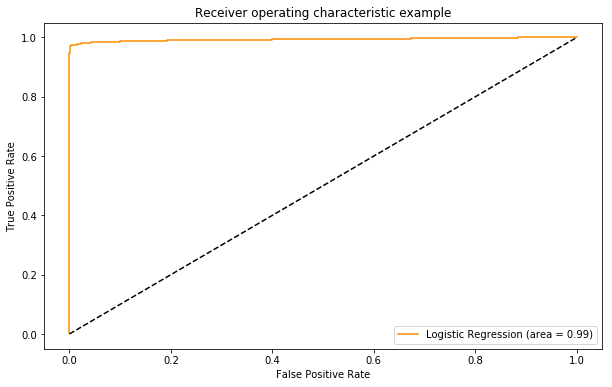

In [113]:
# METRICS

# ROC curve
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, lr.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
#fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, svm.predict(X_test))
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test, mlp.predict_proba(X_test)[:,1])


plt.figure(figsize=(10,6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', label='Logistic Regression (area = %0.2f)' % metrics.auc(fpr_lr, tpr_lr))
#plt.plot(fpr_rf, tpr_rf, color='green', label='Logistic Regression (area = %0.2f)' % metrics.auc(fpr_rf, tpr_rf))
#plt.plot(fpr_mlp, tpr_mlp, color='blue', linestyle="-.", label='MLP (area = %0.2f)' % metrics.auc(fpr_mlp, tpr_mlp))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#plt.savefig("ROC.eps")
plt.show()

In [ ]:
# Train vs Test Error

#print(__doc__)
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

from sklearn import linear_model
# #############################################################################
# Compute train and test errors
alphas = np.logspace(-5, 1, 60)
enet = MLPClassifier(solver='sgd', hidden_layer_sizes=(15,), random_state=1)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(X, y).coef_

# #############################################################################
# Plot results functions

import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

# Show estimated coef_ vs true coef
plt.subplot(2, 1, 2)
plt.plot(coef, label='True coef')
plt.plot(coef_, label='Estimated coef')
plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()

/home/spaceape/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/spaceape/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/spaceape/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/spaceape/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
# parameters tuning using the simple train_test_split
# from sklearn.cross_validation import train_test_split
# features_train, features_test, labels_train, labels_test = \
#     train_test_split(features, labels, test_size=0.3, random_state=42)

One of the most important step is feature selection, as usually the best statistical machine learning models deals with it very effectively and not only select the best features but also create them from availiable variables. The more complex approach to feature selection is often refered as feature engineering which beside feature selection include creating a new features. People working on these models may utilitize their expertise from particular field in order to get more signal bearing features and thus better model.  
Regarding feature selection the lending club dataset has too high dimensionality as it contains a 137?? features, which is from modelling point of a view not applicable. The goal is to have model based on as few as possible features but with very high prediction and generalization ability. Thus is neccessary to execute so called feature selection - procces which helps to achieve those goals mentioned in previous sentence and also it usually improves estimators accuracy as well. 

describe at least one univariate and one multivariate feature selection method.

Popsat take obecne preprocessing - the majority of time during building of model is consumed by preprocessing steps - including data cleaning, data wrangling, etc 

(2004) evaluating...
The actual
mining or extraction of patterns from the data
requires the data to be clean since input data are
the primary, if not the only, source of knowledge
in these systems. Cleaning and preprocessing data
involves several steps including procedures for
handling incomplete, noisy, or missing data; sam-
pling of appropriate data; feature selection; feature
construction; and also formatting the data as per
the representational requirements of methods (e.g.,
decision trees, neural networks) used to extract
knowledge from these data.

conclusion describe
generally good performing nonlinear method